In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import src.utils as utils

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer, StandardScaler
# from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, IsolationForest
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from scipy import stats
import pyhere


ModuleNotFoundError: No module named 'src'

In [6]:
# utils.DIR_DATA_RAW = pyhere.here().resolve().joinpath("data", "raw")
# utils.DIR_DATA_INTERIM = pyhere.here().resolve().joinpath("data", "interim")
# utils.DIR_DATA_EXTERNAL = pyhere.here().resolve().joinpath("data", "external")
print('test')

# DATAFRAMES

In [7]:
csv_power_plants = pd.read_csv(utils.DIR_DATA_INTERIM/"power_plants_with_generation_transformed.csv", index_col=[0])

In [8]:
# df_transformed = pd.read_csv(utils.DIR_DATA_EXTERNAL/"v2_transformed_data_combined_with_nasa.csv", index_col=['index'])
df_transformed = pd.read_csv(utils.DIR_DATA_EXTERNAL/"v5_transformed_data_combined_with_nasa.csv", index_col=['index'])

In [5]:
# csv_power_plants.loc[0:34935, ['capacity_mw', 'primary_fuel_transformed']].index.name = "index"
csv_power_plants.index.rename('index', inplace=True)

In [6]:
df_power_plants_raw = pd.read_csv(utils.DIR_DATA_RAW/"global_power_plant_database.csv", usecols=['primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3'], engine='python')
csv_power_plants = csv_power_plants.join(df_power_plants_raw)

In [7]:

index_set_to_delete = csv_power_plants[csv_power_plants['other_fuel1'].isin(['Solar', 'Wind'])].index.tolist()
index_set_to_delete += (csv_power_plants[csv_power_plants['other_fuel2'].isin(['Solar', 'Wind'])].index.tolist())
index_set_to_delete += (csv_power_plants[csv_power_plants['other_fuel3'].isin(['Solar', 'Wind'])].index.tolist())

csv_power_plants.drop(index_set_to_delete, inplace = True)

# csv_power_plants.filter(like='other_fuel').columns

# csv_power_plants[csv_power_plants['other_fuel1'].isin(['Solar', 'Wind'])]
# csv_power_plants[csv_power_plants['other_fuel2'].isin(['Solar', 'Wind'])]
# csv_power_plants[csv_power_plants['other_fuel3'].isin(['Solar', 'Wind'])]

In [8]:
columns_to_combine = [
                        'capacity_mw',
                        'primary_fuel_transformed',
                        # 'other_fuel1',
                        # 'other_fuel2',
                        # 'other_fuel3',
                        'generation_gwh_2013',
                        'generation_gwh_2014',
                        'generation_gwh_2015',
                        'generation_gwh_2016',
                        'generation_gwh_2017',
                        'generation_gwh_2018',
                        'generation_gwh_2019'
                    ]
# df_transformed_combined = df_transformed.merge(csv_power_plants.loc[0:24360, ['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")
df_transformed_combined = df_transformed.merge(csv_power_plants[columns_to_combine],left_on="index", right_on="index")

primary_fuel_transformed
Other                       18859
Solar                       10664
Wind                         5340
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

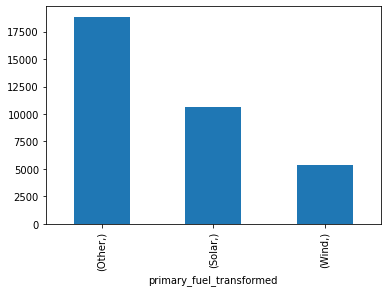

In [9]:
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [10]:
df_transformed_combined.describe()

,latitude,longitude,ANN_ALLSKY_SFC_LW_DWN_2013,ANN_ALLSKY_SFC_LW_DWN_2014,ANN_ALLSKY_SFC_LW_DWN_2015,ANN_ALLSKY_SFC_LW_DWN_2016,ANN_ALLSKY_SFC_LW_DWN_2017,ANN_ALLSKY_SFC_LW_DWN_2018,ANN_ALLSKY_SFC_LW_DWN_2019,ANN_ALLSKY_SFC_LW_UP_2013,...,winter_WS50M_RANGE_AVG_2018,winter_WS50M_RANGE_AVG_2019,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,34873.000000,34873.000000,34873.000000,34873.000000,34873.000000,34873.000000,34873.000000,34873.000000,34873.000000,34873.000000,...,34873.000000,34873.000000,34873.000000,6377.000000,7185.000000,8159.000000,9099.000000,9450.000000,9584.000000,9599.000000
mean,32.804373,-6.815115,329.230132,330.757325,332.063297,332.039128,331.408128,330.617803,329.471139,9.182810,...,4.446168,4.521671,163.369172,591.923604,656.985600,763.086646,693.874878,662.848656,517.272427,423.855623
std,22.655256,78.376089,37.046443,36.581675,37.271382,36.767882,36.535238,36.652360,37.889646,0.943828,...,1.069389,1.031110,489.754813,2172.133044,2231.008032,2533.941656,2405.992505,2371.382457,1973.958025,1697.815213
min,-77.847000,-179.977700,198.520000,198.210000,192.840000,190.880000,199.330000,198.380000,200.320000,5.590000,...,1.433333,1.473333,1.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000
25%,29.234700,-77.590000,306.380000,307.520000,308.460000,310.510000,309.150000,308.480000,305.770000,8.460000,...,3.680000,3.756667,4.900000,1.964000,2.261000,2.667500,2.736580,2.477500,2.244250,2.740000
50%,39.728300,-2.083300,321.090000,324.070000,322.160000,323.290000,323.240000,321.870000,319.340000,8.940000,...,4.526667,4.653333,16.700000,23.643000,23.904167,26.464000,22.638000,17.913150,12.537500,11.514000
75%,46.274400,49.870100,346.970000,347.620000,352.500000,349.880000,349.490000,350.290000,349.580000,9.800000,...,5.143333,5.210000,75.477000,200.826000,228.347819,287.114500,250.955000,216.756250,151.734325,122.870000
max,71.292000,179.388700,434.650000,432.660000,436.400000,433.900000,430.950000,429.760000,432.960000,12.250000,...,9.013333,8.670000,22500.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000


In [11]:
# df_transformed_combined = df_transformed_combined.loc[df_transformed_combined['generation_gwh_2013'].notna() & df_transformed_combined['generation_gwh_2014'].notna() & df_transformed_combined['generation_gwh_2015'].notna() & df_transformed_combined['generation_gwh_2016'].notna() & df_transformed_combined['generation_gwh_2017'].notna() & df_transformed_combined['generation_gwh_2018'].notna() & df_transformed_combined['generation_gwh_2019'].notna()]

primary_fuel_transformed
Other                       18859
Solar                       10664
Wind                         5340
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

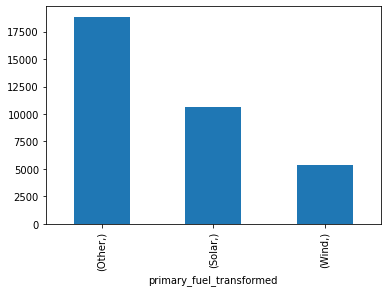

In [12]:
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [13]:
label_encoder = LabelEncoder()
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
# df_transformed_combined.dropna(inplace = True)
df_transformed_combined = df_transformed_combined[df_transformed_combined['primary_fuel_transformed'].notna()]
df_transformed_combined['code_prim_fuel_transf'] = label_encoder.fit_transform(df_transformed_combined['primary_fuel_transformed'])


In [14]:
df_target_equivalent = df_transformed_combined[['primary_fuel_transformed', 'code_prim_fuel_transf']].drop_duplicates()
df_target_equivalent

,primary_fuel_transformed,code_prim_fuel_transf
index,,
0,Other,0
1,Solar,1
91,Wind,2


# REMOVING OUTLIERS

In [15]:

columns_not_consider_outliers = [
                                    'capacity_mw',
                                    'latitude',
                                    'longitude',
                                    'primary_fuel_transformed',
                                    'code_prim_fuel_transf',
                                    'generation_gwh_2013',
                                    'generation_gwh_2014',
                                    'generation_gwh_2015',
                                    'generation_gwh_2016',
                                    'generation_gwh_2017',
                                    'generation_gwh_2018',
                                    'generation_gwh_2019'
                                ]
# X = X.loc[:,~columns_delete]                        
df_transformed_combined_remove_outliers = df_transformed_combined.drop(columns = columns_not_consider_outliers)

In [16]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df_transformed_combined_remove_outliers)

/home/tomas/renewable_power_plants/renewable_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [17]:
# select all rows that are outliers
mask = yhat == -1
index_outliers = df_transformed_combined[mask].index

primary_fuel_transformed
Other                       18859
Solar                       10664
Wind                         5340
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

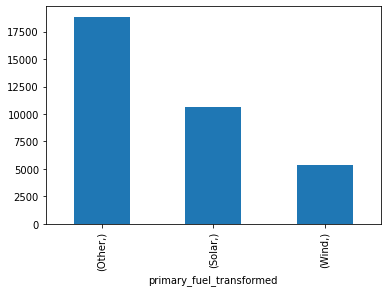

In [18]:
# WITH OUTLIERS
print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

primary_fuel_transformed
Other                       16663
Solar                       10021
Wind                         4692
dtype: int64


<AxesSubplot:xlabel='primary_fuel_transformed'>

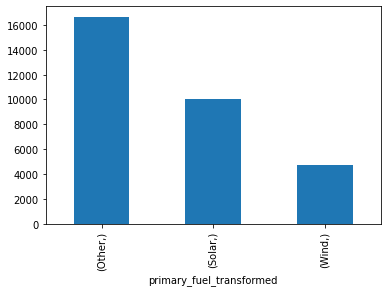

In [19]:
# WITHOUT OUTLIERS
df_transformed_combined.drop(index_outliers, axis=0, inplace =True)

print(df_transformed_combined[['primary_fuel_transformed']].value_counts())
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

# BALANCING THE DATA

In [20]:
target_with_less_value = df_transformed_combined[['primary_fuel_transformed']].value_counts().sort_values().index[0][0]
value_of_target_with_less_value = df_transformed_combined[['primary_fuel_transformed']].value_counts().sort_values()[0]
dict_outbalanced_targets_values = df_transformed_combined[['primary_fuel_transformed']].value_counts().sort_values()[1:].to_dict()

dict_outbalanced_targets_values
if(value_of_target_with_less_value > 1000):
    for key_tuple, value in dict_outbalanced_targets_values.items():
        difference = (value - value_of_target_with_less_value)
        index_rows_to_delete = df_transformed_combined[df_transformed_combined['primary_fuel_transformed'] == key_tuple[0]].sample(difference).index
        df_transformed_combined.drop(index_rows_to_delete, axis = 0, inplace = True)
        

In [21]:
# index_rows_to_delete_other = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(4000).index
# index_rows_to_delete_other = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(13500).index
# index_rows_to_delete = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 0].sample(9000).index
# index_rows_to_delete_wind = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 2].sample(100).index
# index_rows_to_delete_solar = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 1].sample(5300).index
# index_rows_to_delete_solar = df_transformed_combined[df_transformed_combined['code_prim_fuel_transf'] == 1].sample(3000).index


In [22]:
# df_transformed_combined.drop(index_rows_to_delete_other, axis = 0, inplace = True)
# df_transformed_combined.drop(index_rows_to_delete_solar, axis = 0, inplace = True)
# df_transformed_combined.drop(index_rows_to_delete_wind, axis = 0, inplace = True)

<AxesSubplot:xlabel='primary_fuel_transformed'>

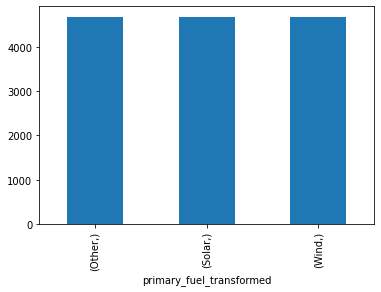

In [23]:
df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [24]:
df_transformed_combined.isna().sum()

latitude                          0
longitude                         0
ANN_ALLSKY_SFC_LW_DWN_2013        0
ANN_ALLSKY_SFC_LW_DWN_2014        0
ANN_ALLSKY_SFC_LW_DWN_2015        0
                              ...  
generation_gwh_2016           10575
generation_gwh_2017           10341
generation_gwh_2018           10179
generation_gwh_2019           10062
code_prim_fuel_transf             0
Length: 642, dtype: int64

In [25]:
# index_to_drop = df_transformed_combined[df_transformed_combined['primary_fuel_transformed'] == 'Wind'].index
# df_transformed_combined.drop(index_to_drop, inplace=True)
# X = X.loc[:,~columns_delete]

In [26]:
# df_transformed_combined.isna().sum()
# df_transformed_combined[df_transformed_combined.isna().any(axis=1)]
# df_transformed_combined.dropna(inplace = True)
columns_to_drop = [
                        'capacity_mw',
                        'latitude',
                        'longitude',
                        'primary_fuel_transformed',
                        'generation_gwh_2013',
                        'generation_gwh_2014',
                        'generation_gwh_2015',
                        'generation_gwh_2016',
                        'generation_gwh_2017',
                        'generation_gwh_2018',
                        'generation_gwh_2019'
                    ]
pre_X = df_transformed_combined.drop(columns=columns_to_drop)
pre_X.dropna(inplace = True)
X = pre_X.drop(columns=['code_prim_fuel_transf'])
y = pre_X['code_prim_fuel_transf']

In [27]:
y.value_counts()

0    4692
1    4692
2    4692
Name: code_prim_fuel_transf, dtype: int64

In [28]:
# sns.kdeplot(data=pre_X, x='winter_TQV_2009', hue='code_prim_fuel_transf', shade=True)

# FUNCTIONS

In [29]:
# def utils.make_mi_scores(X, y):
#     mi_scores = mutual_info_classif(X, y)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

In [30]:
# def utils.get_accuracy(max_leaf_nodes, X_train, X_test, y_train, y_test):
#     model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state=0)
#     model.fit(X_train, y_train)
#     preds_val = model.predict(X_test)
#     accuracy = accuracy_score(y_test, preds_val)

#     return accuracy

In [31]:
# def utils.get_accuracy_knn(n_neighbors, X_train, X_test, y_train, y_test):
#     model = KNeighborsClassifier(n_neighbors = n_neighbors)
#     model.fit(X_train, y_train)
#     preds_val = model.predict(X_test)
#     accuracy = accuracy_score(y_test, preds_val)

#     return accuracy

In [32]:
# def utils.plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")

In [33]:
# def utils.correlation_matrix(df: pd.DataFrame):
#     """
#     A function to calculate and plot
#     correlation matrix of a DataFrame.
#     """
#     # Create the matrix
#     matrix = df.corr()
    
#     # Create cmap
#     cmap = sns.diverging_palette(250, 15, s=75, l=40,
#                              n=9, center="light", as_cmap=True)
#     # Create a mask
#     mask = np.triu(np.ones_like(matrix, dtype=bool))
    
#     # Make figsize bigger
#     fig, ax = plt.subplots(figsize=(16,12))
    
#     # Plot the matrix
#     _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
#              fmt='.2f', square=True, cmap=cmap, ax=ax)

In [34]:
# utils.correlation_matrix(X.join(y))

In [35]:
# mi_scores = utils.make_mi_scores(X, y)
# mi_scores[::3]

In [36]:
# mi_scores[:-3]

In [ ]:
mi_scores = utils.make_mi_scores(X, y)
plt.figure(dpi=100, figsize=(8, 30))
utils.plot_mi_scores(mi_scores)

In [62]:
# RANGE
# ANN
# ALLSKY_SFC_SW_UP
# CLRSKY_SFC_SW_UP
# SW_DIFF
# columns_delete = X.columns.str.contains('SW_DIFF') | X.columns.str.contains('RANGE') | X.columns.str.contains('ALLSKY_SFC_SW_UP') |  X.columns.str.contains('CLRSKY_SFC_SW_UP') | X.columns.str.contains('ANN') | X.columns.str.contains('2019') | X.columns.str.contains('2013') | X.columns.str.contains('2014') | X.columns.str.contains('2015') | X.columns.str.contains('2016') | X.columns.str.contains('2017') 
# columns_delete = X.columns.str.contains('SW_DIFF') | X.columns.str.contains('RANGE') | X.columns.str.contains('ALLSKY_SFC_SW_UP') |  X.columns.str.contains('CLRSKY_SFC_SW_UP') #| X.columns.str.contains('ANN') 
# X = X.loc[:,~columns_delete]

In [35]:
mi_scores = utils.make_mi_scores(X, y)
plt.figure(dpi=100, figsize=(8, 30))
utils.plot_mi_scores(mi_scores)

KeyboardInterrupt: 

In [37]:
# CLIMATE_FEATURES = {'ALLSKY_SFC_SW_DWN', 
#                     'CLRSKY_SFC_SW_DWN', 
#                     'ALLSKY_KT', 
#                     'WS10M_MIN_AVG', 
#                     'WS10M_MAX_AVG', 
#                     'WS50M_MAX_AVG', 
#                     'WS50M_MIN_AVG'} 
CLIMATE_FEATURES = {"ALLSKY_SFC_SW_DWN",
                        "CLRSKY_SFC_SW_DWN",
                        # "ALLSKY_SFC_SW_DIFF",
                        # "ALLSKY_SFC_SW_UP",
                        "ALLSKY_SFC_LW_DWN",
                        "ALLSKY_SFC_LW_UP",
                        "ALLSKY_SFC_SW_DNI",
                        # "ALLSKY_SFC_SW_DNI_MAX_RD",
                        # "ALLSKY_SFC_SW_UP_MAX",
                        # "CLRSKY_SFC_SW_DIFF",
                        "CLRSKY_SFC_SW_DNI",
                        # "CLRSKY_SFC_SW_UP",
                        #"ALLSKY_KT",
                        "WS10M_MAX_AVG",
                        "WS50M_MAX_AVG",
                        "WS50M",
                        # "WS50M_RANGE_AVG",
                        "WS10M",
                        "T2M",
                        # "WS10M_RANGE_AVG"
                    }   
SEASONS = {'autumn', 'spring', 'summer', 'winter'}
YEARS = {'2013', '2014', '2015', '2016', '2017', '2018'}

list_total = []
for feature in CLIMATE_FEATURES:
    feature_string = ""
    
    for season in SEASONS:
        dict_features_to_apply_mean = {}
        list_to_append = []
        for year in YEARS:
            feature_string = f"{season}_{feature}_{year}"
            
            list_to_append.append(feature_string)
        dict_features_to_apply_mean = {f"{season}_{feature}": list_to_append}
        # print("sasa")
        # print(dict_features_to_apply_mean)
    
        list_total.append(dict_features_to_apply_mean)
print(list_total)
# X[['autumn_ALLSKY_SFC_SW_DWN_2012', 'salary_3']].mean(axis=1)

[{'summer_WS10M_MAX_AVG': ['summer_WS10M_MAX_AVG_2014', 'summer_WS10M_MAX_AVG_2016', 'summer_WS10M_MAX_AVG_2018', 'summer_WS10M_MAX_AVG_2017', 'summer_WS10M_MAX_AVG_2015', 'summer_WS10M_MAX_AVG_2013']}, {'spring_WS10M_MAX_AVG': ['spring_WS10M_MAX_AVG_2014', 'spring_WS10M_MAX_AVG_2016', 'spring_WS10M_MAX_AVG_2018', 'spring_WS10M_MAX_AVG_2017', 'spring_WS10M_MAX_AVG_2015', 'spring_WS10M_MAX_AVG_2013']}, {'autumn_WS10M_MAX_AVG': ['autumn_WS10M_MAX_AVG_2014', 'autumn_WS10M_MAX_AVG_2016', 'autumn_WS10M_MAX_AVG_2018', 'autumn_WS10M_MAX_AVG_2017', 'autumn_WS10M_MAX_AVG_2015', 'autumn_WS10M_MAX_AVG_2013']}, {'winter_WS10M_MAX_AVG': ['winter_WS10M_MAX_AVG_2014', 'winter_WS10M_MAX_AVG_2016', 'winter_WS10M_MAX_AVG_2018', 'winter_WS10M_MAX_AVG_2017', 'winter_WS10M_MAX_AVG_2015', 'winter_WS10M_MAX_AVG_2013']}, {'summer_T2M': ['summer_T2M_2014', 'summer_T2M_2016', 'summer_T2M_2018', 'summer_T2M_2017', 'summer_T2M_2015', 'summer_T2M_2013']}, {'spring_T2M': ['spring_T2M_2014', 'spring_T2M_2016', 'spri

In [38]:
for dict_season_feature in list_total:
    for season_feature in dict_season_feature:
        print(dict_season_feature[season_feature])
        X[f'mean_{season_feature}']= X[dict_season_feature[season_feature]].mean(axis=1)
        X[f'std_{season_feature}']= X[dict_season_feature[season_feature]].std(axis=1)

['summer_WS10M_MAX_AVG_2014', 'summer_WS10M_MAX_AVG_2016', 'summer_WS10M_MAX_AVG_2018', 'summer_WS10M_MAX_AVG_2017', 'summer_WS10M_MAX_AVG_2015', 'summer_WS10M_MAX_AVG_2013']
['spring_WS10M_MAX_AVG_2014', 'spring_WS10M_MAX_AVG_2016', 'spring_WS10M_MAX_AVG_2018', 'spring_WS10M_MAX_AVG_2017', 'spring_WS10M_MAX_AVG_2015', 'spring_WS10M_MAX_AVG_2013']
['autumn_WS10M_MAX_AVG_2014', 'autumn_WS10M_MAX_AVG_2016', 'autumn_WS10M_MAX_AVG_2018', 'autumn_WS10M_MAX_AVG_2017', 'autumn_WS10M_MAX_AVG_2015', 'autumn_WS10M_MAX_AVG_2013']
['winter_WS10M_MAX_AVG_2014', 'winter_WS10M_MAX_AVG_2016', 'winter_WS10M_MAX_AVG_2018', 'winter_WS10M_MAX_AVG_2017', 'winter_WS10M_MAX_AVG_2015', 'winter_WS10M_MAX_AVG_2013']
['summer_T2M_2014', 'summer_T2M_2016', 'summer_T2M_2018', 'summer_T2M_2017', 'summer_T2M_2015', 'summer_T2M_2013']
['spring_T2M_2014', 'spring_T2M_2016', 'spring_T2M_2018', 'spring_T2M_2017', 'spring_T2M_2015', 'spring_T2M_2013']
['autumn_T2M_2014', 'autumn_T2M_2016', 'autumn_T2M_2018', 'autumn_T2M_

In [43]:
#  columns_delete = X.columns.str.contains('ALLSKY_KT') | X.columns.str.contains('ANN') | X.columns.str.contains('autumn_CLRSKY_SFC_SW_DWN_2019')
# columns_delete = X.columns.str.contains('ALLSKY_KT') | X.columns.str.contains('ANN') | X.columns.str.contains('2019') | X.columns.str.contains('2013') | X.columns.str.contains('2014') | X.columns.str.contains('2015') | X.columns.str.contains('2016') | X.columns.str.contains('2017') | X.columns.str.contains('MIN')
# columns_delete = X.columns.str.contains('ALLSKY_KT') | X.columns.str.contains('2019') | X.columns.str.contains('2012') | X.columns.str.contains('2013') | X.columns.str.contains('2014') | X.columns.str.contains('2015') | X.columns.str.contains('2016') | X.columns.str.contains('2017') | X.columns.str.contains('2018') | X.columns.str.contains('MIN') | X.columns.str.contains('ANN')
# columns_delete = X.columns.str.contains('2019') | X.columns.str.contains('2013') | X.columns.str.contains('2014') | X.columns.str.contains('2015') | X.columns.str.contains('2016') | X.columns.str.contains('2017') | X.columns.str.contains('2018') | X.columns.str.contains('ANN') #| X.columns.str.contains('WS50M_RANGE_AVG') | X.columns.str.contains('WS10M_RANGE_AVG') | X.columns.str.contains('CLRSKY_SFC_SW_UP') | X.columns.str.contains('CLRSKY_SFC_SW_DNI') | X.columns.str.contains('CLRSKY_SFC_SW_DIFF') | X.columns.str.contains('ALLSKY_SFC_SW_UP_MAX') | X.columns.str.contains('ALLSKY_SFC_SW_DNI') | X.columns.str.contains('ALLSKY_SFC_LW_UP') | X.columns.str.contains('ALLSKY_SFC_LW_DWN') | X.columns.str.contains('ALLSKY_SFC_SW_UP') | X.columns.str.contains('ALLSKY_SFC_SW_DIFF')
columns_keep = X.columns.str.contains('ANN') | X.columns.str.contains('SFC_LW_DWN') | X.columns.str.contains('2013')| X.columns.str.contains('MAX')
# columns_delete = X.columns.str.contains('WS') | X.columns.str.contains('2014') | X.columns.str.contains('2015') | X.columns.str.contains('2016') | X.columns.str.contains('2017') | X.columns.str.contains('2018') | X.columns.str.contains('2019')
columns_delete = X.columns.str.contains('2019') | X.columns.str.contains('2012') | X.columns.str.contains('2013') | X.columns.str.contains('2014') | X.columns.str.contains('2015') | X.columns.str.contains('2016') | X.columns.str.contains('2017') | X.columns.str.contains('2018') |  X.columns.str.contains('ANN') |  X.columns.str.contains('LW') |  X.columns.str.contains('WS10') | X.columns.str.contains('MAX') 
                 
# columns_delete = X.columns.str.contains('ANN') | X.columns.str.contains('2019') | X.columns.str.contains('2013') | X.columns.str.contains('2014') | X.columns.str.contains('2015') | X.columns.str.contains('2016') | X.columns.str.contains('2017') 
# columns_delete = X.columns.str.contains('WS50M_2013') | X.columns.str.contains('WS10') | X.columns.str.contains('DNI') | X.columns.str.contains('SFC_LW_UP') | X.columns.str.contains('SFC_SW_DWN') | X.columns.str.contains('autumn') | X.columns.str.contains('winter') | X.columns.str.contains('summer') | X.columns.str.contains('spring') | X.columns.str.contains('2014') | X.columns.str.contains('2015') | X.columns.str.contains('2016') | X.columns.str.contains('2017') | X.columns.str.contains('2018') | X.columns.str.contains('2019')
# columns_delete = X.columns.str.contains('WS50M_2013') | X.columns.str.contains('WS10') | X.columns.str.contains('autumn') | X.columns.str.contains('winter') | X.columns.str.contains('summer') | X.columns.str.contains('spring') | X.columns.str.contains('2014') | X.columns.str.contains('2015') | X.columns.str.contains('2016') | X.columns.str.contains('2017') | X.columns.str.contains('2018') | X.columns.str.contains('2019')
# X = X.loc[:,~columns_delete]
# X = X.loc[:,columns_keep]
X = X.loc[:,~columns_delete]

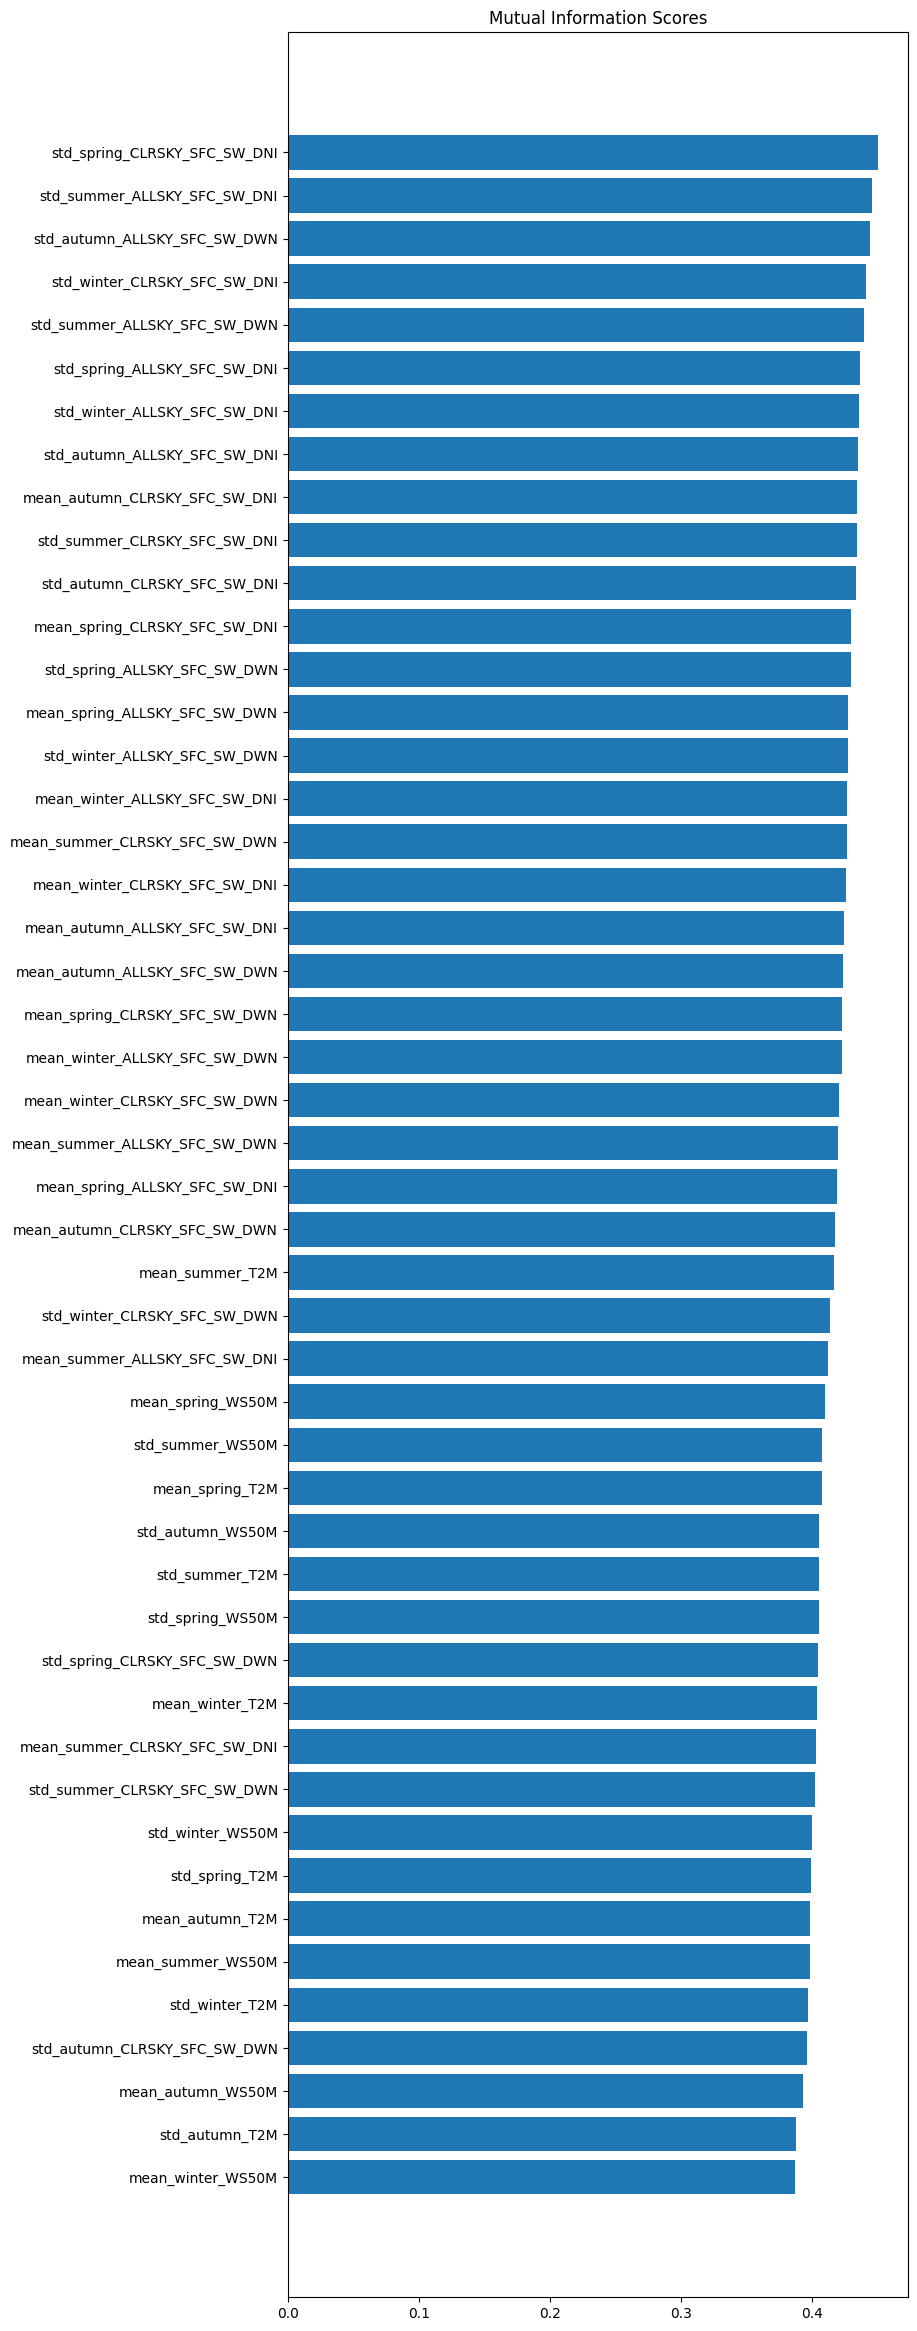

In [44]:
mi_scores = utils.make_mi_scores(X, y)
plt.figure(dpi=100, figsize=(8, 30))
utils.plot_mi_scores(mi_scores)

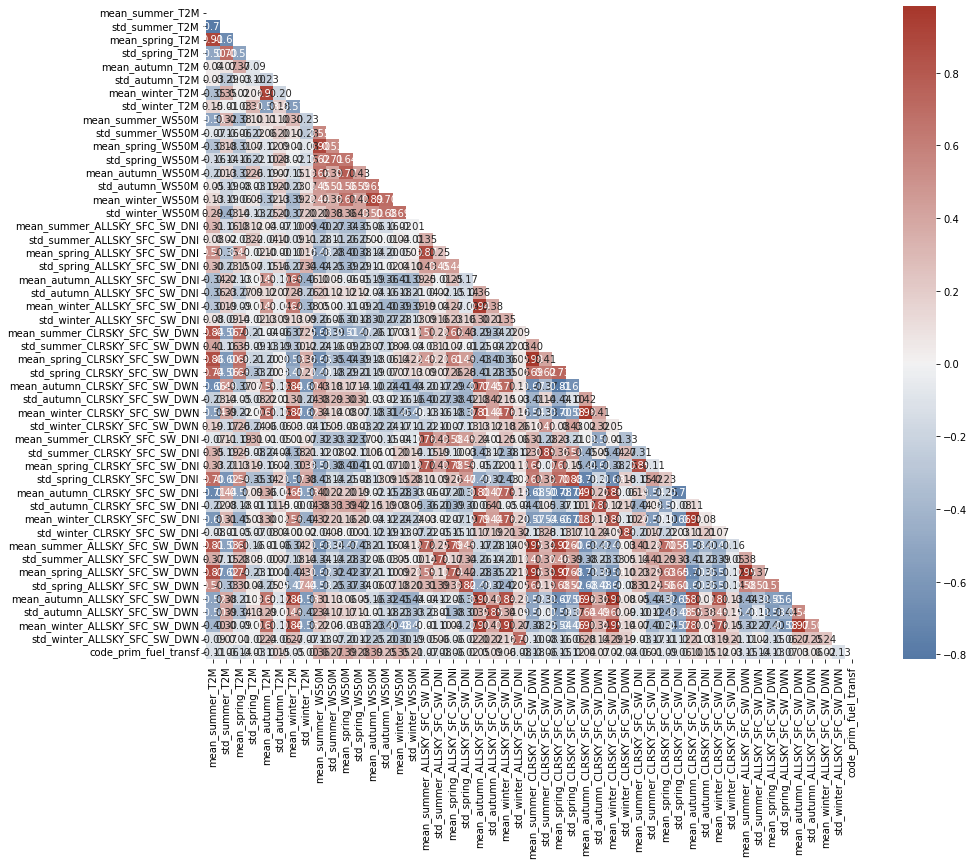

In [45]:
utils.correlation_matrix(X.join(y))

In [46]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2,random_state = 0)

# DECISION TREE CLASSIFIER

1200


<AxesSubplot:>

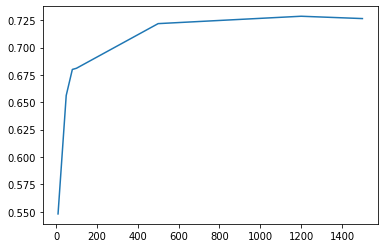

In [47]:
candidate_max_leaf_nodes = [10, 50, 80, 100, 500, 1200, 1500]
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {node: utils.get_accuracy(node, train_X, val_X, train_y, val_y) for node in candidate_max_leaf_nodes}
# results = {node: utils.get_accuracy(node, train_X_scaled_pca, val_X_scaled_pca, train_y, val_y) for node in candidate_max_leaf_nodes}
# for node in candidate_max_leaf_nodes:
#     results[node] = utils.get_accuracy(node, X_train, X_test, y_train, y_test)
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = max(results, key=results.get)
print(best_tree_size)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [48]:
tree_model = DecisionTreeClassifier(max_leaf_nodes = best_tree_size, random_state=0)
tree_model.fit(train_X, train_y)

DecisionTreeClassifier(max_leaf_nodes=1200, random_state=0)

0.729
[0.73  0.739 0.725 0.729 0.721]
Mean: 0.729, Standard Deviation: 0.006


<AxesSubplot:>

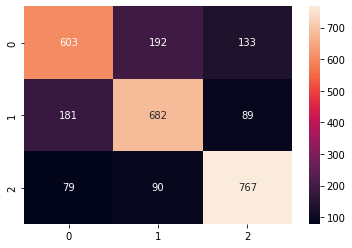

In [49]:
y_pred = tree_model.predict(val_X)
print(np.around(tree_model.score(val_X, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(tree_model, X, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

Feature: mean_summer_T2M, Score: 1.37 %
Feature: std_summer_T2M, Score: 2.7 %
Feature: mean_spring_T2M, Score: 1.71 %
Feature: std_spring_T2M, Score: 3.06 %
Feature: mean_autumn_T2M, Score: 3.46 %
Feature: std_autumn_T2M, Score: 2.63 %
Feature: mean_winter_T2M, Score: 1.86 %
Feature: std_winter_T2M, Score: 1.72 %
Feature: mean_summer_WS50M, Score: 1.98 %
Feature: std_summer_WS50M, Score: 1.44 %
Feature: mean_spring_WS50M, Score: 4.61 %
Feature: std_spring_WS50M, Score: 3.24 %
Feature: mean_autumn_WS50M, Score: 11.61 %
Feature: std_autumn_WS50M, Score: 1.96 %
Feature: mean_winter_WS50M, Score: 4.63 %
Feature: std_winter_WS50M, Score: 1.99 %
Feature: mean_summer_ALLSKY_SFC_SW_DNI, Score: 1.59 %
Feature: std_summer_ALLSKY_SFC_SW_DNI, Score: 2.26 %
Feature: mean_spring_ALLSKY_SFC_SW_DNI, Score: 0.77 %
Feature: std_spring_ALLSKY_SFC_SW_DNI, Score: 0.95 %
Feature: mean_autumn_ALLSKY_SFC_SW_DNI, Score: 0.98 %
Feature: std_autumn_ALLSKY_SFC_SW_DNI, Score: 0.86 %
Feature: mean_winter_ALLSKY_SFC

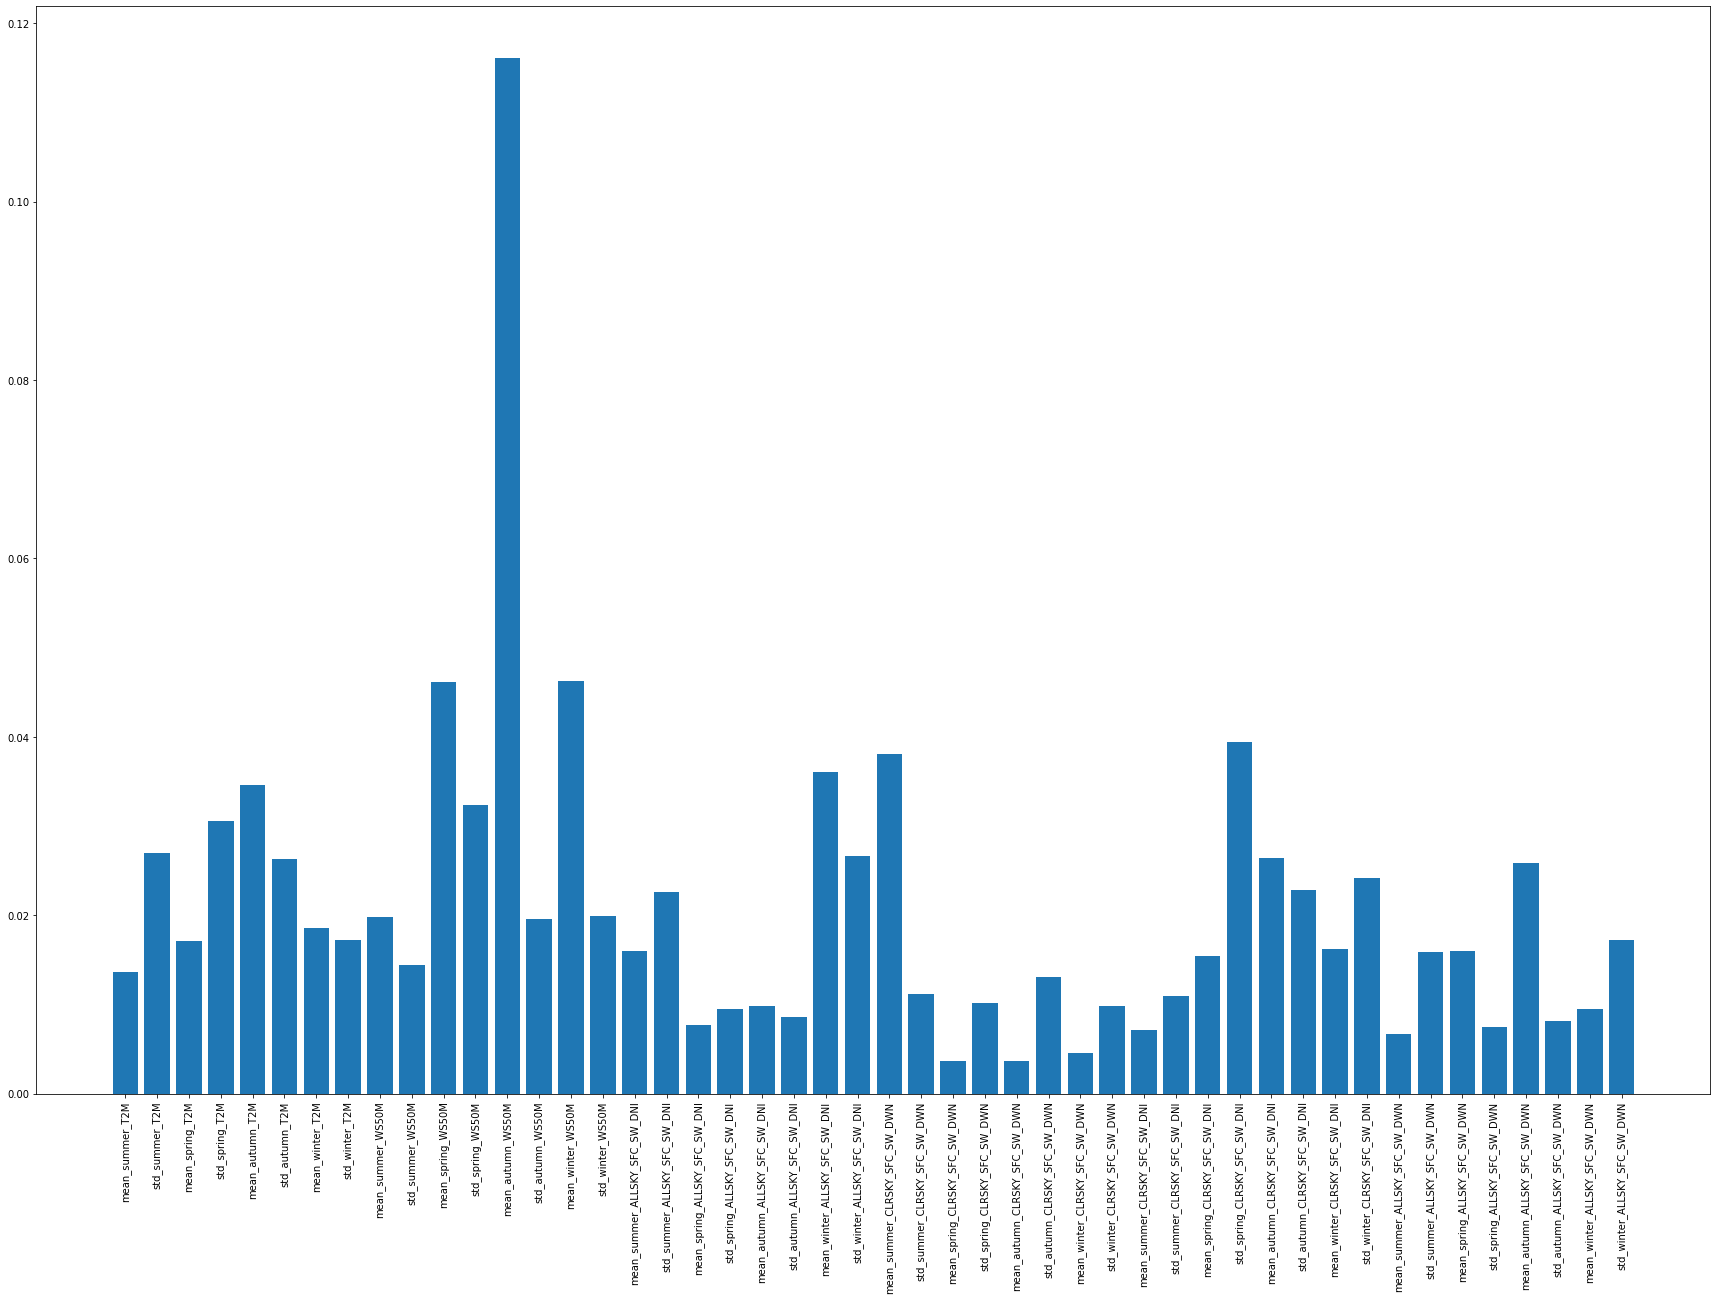

In [50]:
importance = tree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {train_X.columns[i]}, Score: {np.around(v*100,2)} %')
	# print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(30,20))
plt.bar([train_X.columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

# RANDOM FOREST CLASSIFIER

In [51]:
# Numbers of trees
n_estimators = [int(x) for x in np.arange(10, 101, 10)]
# Numbers of features to consider at every split
# max_features = [1, "sqrt", "log2"]
# Maximum numbers of levels in tree
max_depth = [50, 100, 500]
# Minimum numbers of samples required to split a node
min_samples_split = [2, 10, 50 ]
# Minimum numbers of samples required at each leaf node
min_samples_leaf = [1, 10, 50, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]

max_leaf_nodes = [10, 100, 500]

param_grid = {
                'n_estimators': n_estimators,
                # 'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap,
                'max_leaf_nodes': max_leaf_nodes
            }



In [64]:
rf_model = RandomForestClassifier(random_state=0)
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, verbose = 2, n_jobs=4)
# rf_grid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, n_iter = 10, cv=5, verbose = 2, n_jobs=4)

In [66]:
# rf_grid.fit(train_X_scaled_pca, train_y)
rf_grid.fit(train_X, train_y)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
[CV] END bootstrap=True, max_depth=50, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total tim

KeyboardInterrupt: 

In [67]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_leaf_nodes': 500,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [68]:
rf_grid.score(val_X, val_y)
# rf_grid.score(val_X_scaled_pca, val_y)

0.7496448863636364

In [69]:
rf_model2 = RandomForestClassifier(bootstrap= False,
 max_depth= 50,
 min_samples_leaf= 1,
 min_samples_split= 10,
 n_estimators= 70,
 max_leaf_nodes= 500)
rf_model2.fit(train_X, train_y)

RandomForestClassifier(bootstrap=False, max_depth=50, max_leaf_nodes=500,
                       min_samples_split=10, n_estimators=70)

0.744
[0.766 0.762 0.752 0.749 0.765]
Mean: 0.759, Standard Deviation: 0.007


<AxesSubplot:>

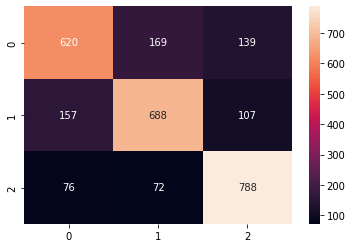

In [70]:
y_pred = rf_model2.predict(val_X)
print(np.around(rf_model2.score(val_X, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(rf_model2, X, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [ ]:
importance = rf_model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {train_X.columns[i]}, Score: {np.around(v*100,2)} %')
	# print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(30,10))
plt.bar([train_X.columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

In [ ]:
accuracy_score(val_y, y_pred)

In [ ]:
rf_model2.score(val_X, val_y)

In [ ]:
print(val_y.value_counts())
val_y.value_counts().plot.bar()

# XGBOOST

In [60]:
xgbclass_model_1 = XGBClassifier()
xgbclass_model_1.fit(train_X, train_y)
# xgbclass_model_1.fit(train_X_scaled_pca, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

0.758
[0.777 0.752 0.761 0.758 0.747]
Mean: 0.759, Standard Deviation: 0.01


<AxesSubplot:>

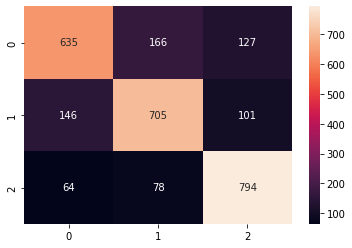

In [61]:
y_pred = xgbclass_model_1.predict(val_X)
print(np.around(xgbclass_model_1.score(val_X, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(xgbclass_model_1, X, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [101]:
param_grid = {
                'n_estimators': [5,10,50,100,500],
                'learning_rate': [0.001,0.01,0.05,0.1,0.2],
                'max_depth': [2,4,6],
                'gamma': [0.0,0.1,0.2]
            }

In [102]:
xgb_grid = GridSearchCV(estimator = XGBClassifier(), param_grid = param_grid, cv=4, verbose = 2, n_jobs=4)

In [103]:
xgb_grid.fit(train_X, train_y)

Fitting 4 folds for each of 225 candidates, totalling 900 fits
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=5; total time=   0.9s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=5; total time=   0.8s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=5; total time=   0.9s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=5; total time=   0.9s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=10; total time=   1.6s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=10; total time=   1.8s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=10; total time=   1.8s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=10; total time=   1.9s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=50; total time=   6.5s
[CV] END gamma=0.0, learning_rate=0.001, max_depth=2, n_estimators=50; total time=   6.5s
[CV] END gamma=0.0, learning_rate=0.001, 

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [5, 10, 50, 100, 500]},
             verbose=2)

In [104]:
xgb_grid.best_params_

{'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}

In [109]:
xgb_grid.score(val_X, val_y)

0.7579617834394905

In [73]:
xgbclass_model_2 = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=6, gamma=0.2, n_jobs=4)
# xgbclass_model_2 = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4, early_stopping_rounds=5)
xgbclass_model_2.fit(train_X, train_y, 
             eval_set=[(val_X, val_y)], 
             verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

0.748
[0.772 0.751 0.748 0.761 0.766]
Mean: 0.76, Standard Deviation: 0.009


<AxesSubplot:>

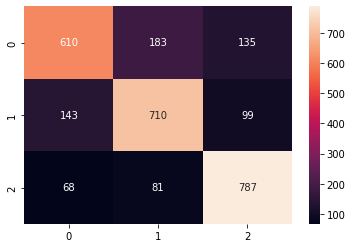

In [74]:
y_pred = xgbclass_model_2.predict(val_X)
print(np.around(xgbclass_model_2.score(val_X, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(xgbclass_model_2, X, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# KNN

5


<AxesSubplot:>

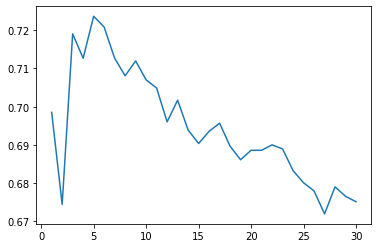

In [55]:
candidate_n_neighbors = np.arange(1,31)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


# results = {n: utils.get_accuracy_knn(n, train_X_scaled_pca, val_X_scaled_pca, train_y, val_y) for n in candidate_n_neighbors}
results = {n: utils.get_accuracy_knn(n, train_X, val_X, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [56]:
knn_model_1 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_1.fit(train_X, train_y)

KNeighborsClassifier()

0.724
[0.715 0.719 0.702 0.719 0.702]
Mean: 0.712, Standard Deviation: 0.008


<AxesSubplot:>

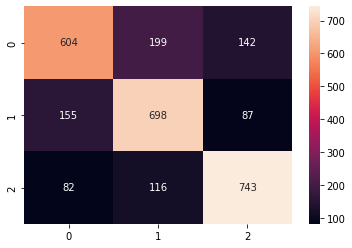

In [57]:
y_pred = knn_model_1.predict(val_X)
print(np.around(knn_model_1.score(val_X, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(knn_model_1, X, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [58]:
# train_X_normalized = stats.boxcox(train_X)
x = train_X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')
standard_scaler = StandardScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = power_transformer.fit_transform(x)
x_scaled = standard_scaler.fit_transform(x)
train_X_scaled = pd.DataFrame(x_scaled, index=train_X.index, columns=train_X.columns)

x = val_X.values #returns a numpy array
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = power_transformer.fit_transform(x)
x_scaled = standard_scaler.fit_transform(x)
val_X_scaled = pd.DataFrame(x_scaled, index=val_X.index, columns=val_X.columns)

x = X.values #returns a numpy array
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = power_transformer.fit_transform(x)
x_scaled = standard_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled, index=X.index, columns=X.columns)


In [59]:
train_X_scaled

,mean_summer_ALLSKY_SFC_SW_DNI,std_summer_ALLSKY_SFC_SW_DNI,mean_autumn_ALLSKY_SFC_SW_DNI,std_autumn_ALLSKY_SFC_SW_DNI,mean_spring_ALLSKY_SFC_SW_DNI,std_spring_ALLSKY_SFC_SW_DNI,mean_winter_ALLSKY_SFC_SW_DNI,std_winter_ALLSKY_SFC_SW_DNI,mean_summer_ALLSKY_SFC_LW_DWN,std_summer_ALLSKY_SFC_LW_DWN,...,mean_winter_ALLSKY_SFC_LW_UP,std_winter_ALLSKY_SFC_LW_UP,mean_summer_CLRSKY_SFC_SW_DNI,std_summer_CLRSKY_SFC_SW_DNI,mean_autumn_CLRSKY_SFC_SW_DNI,std_autumn_CLRSKY_SFC_SW_DNI,mean_spring_CLRSKY_SFC_SW_DNI,std_spring_CLRSKY_SFC_SW_DNI,mean_winter_CLRSKY_SFC_SW_DNI,std_winter_CLRSKY_SFC_SW_DNI
index,,,,,,,,,,,,,,,,,,,,,
27020,0.796350,-0.243901,0.608128,0.077214,0.662666,0.232581,-0.073887,1.346022,0.013988,-0.404338,...,1.119412,-1.262412,0.371626,-0.686641,0.285877,-0.178115,0.119289,-0.582698,-0.013741,0.452538
3725,-0.622789,-1.295334,0.852451,1.228841,-0.996073,-0.586226,0.748252,1.371760,-1.441212,0.733052,...,0.317441,1.149827,0.212702,-0.383660,1.387297,-0.736953,-0.446176,-1.162149,1.069639,1.766438
25018,0.759206,1.287009,2.554073,-0.366775,1.150102,0.626680,2.579394,1.199553,-0.665449,0.971583,...,1.037723,-1.590728,0.510975,-1.257167,1.423923,-1.032435,0.302177,-0.950984,1.626185,0.182502
23322,-1.443993,-0.898523,-0.196153,0.327238,-1.714294,-1.196168,-0.565064,-0.493703,-0.684516,-0.054305,...,-0.095984,0.586653,-1.073133,0.043003,0.921351,1.582016,-1.415600,-0.237702,0.896806,0.408866
32526,-0.325234,-1.215323,0.346537,-0.707061,-0.289573,-0.333685,0.253047,-1.190694,-1.083131,0.977324,...,0.696035,0.049103,-0.160139,-1.028448,0.414855,-1.083926,-0.386995,-0.509141,0.192790,-0.959325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32389,-0.599776,-0.120557,0.196554,0.375433,-0.859461,0.047684,0.300460,0.077085,-1.391575,1.723408,...,0.326150,0.515211,0.133007,0.149161,0.732200,-0.489540,-0.477485,-1.121399,0.487368,-0.368448
8800,1.763707,-1.735574,-0.632351,-0.717545,1.571254,-0.452202,-1.325534,0.131213,0.627959,-0.214358,...,-1.510422,-0.927378,1.069770,0.310500,-0.741243,-1.172354,1.498397,-0.014371,-0.558692,0.598089
24222,-1.523933,-0.859537,-0.319593,-0.453892,-1.748649,-1.324908,-0.855431,-1.176878,-0.620579,-0.276829,...,-0.219970,-0.177655,-1.055889,0.408105,1.154716,0.769641,-1.494253,-0.479336,1.057682,0.270573


In [60]:
def axis_calculation(total_columns_df, grid_columns):
    rows = int(total_columns_df / grid_columns)
    if( total_columns_df % grid_columns) > 0:
        rows += 1

    return (rows, grid_columns)
print(axis_calculation(30, 4))

(8, 4)


In [61]:

# # plt.figure(figsize=(200,200))
# grid_columns = 5
# result_axis = axis_calculation(len(train_X_scaled.columns), grid_columns)
# fig, axs = plt.subplots(result_axis[0],result_axis[1], figsize=(30,20))
# fig.subplots_adjust(hspace=.5)

# aux_cont = 0
# aux_cont_2 = 0
# # fig.figsize=(30,30)
# for col in train_X_scaled.columns:
# # #     # print(col)
#     sns.kdeplot(data=train_X_scaled, x=col, shade=True, ax=axs[aux_cont_2, aux_cont] )
#     # axs[aux_cont_2, aux_cont].set_xlabel('Participation Rate')
#     # axs[aux_cont_2, aux_cont].set_ylabel('Frequency')
#     # axs[aux_cont_2, aux_cont].set_title("sasa")
#     axs[aux_cont_2, aux_cont].set_xticklabels([])
#     aux_cont += 1
#     if aux_cont >= grid_columns:
#         aux_cont_2 +=1
#         aux_cont = 0

In [62]:
# train_X_scaled.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))


In [63]:
# WITHOUT SCALING OR NORMALIZING
# train_X.hist(bins=100, xlabelsize=8, ylabelsize=10, figsize=(30,20))

5


<AxesSubplot:>

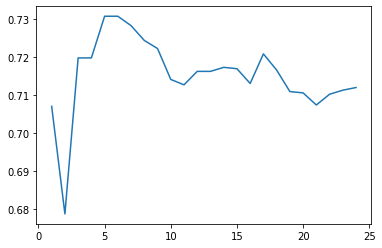

In [64]:
candidate_n_neighbors = np.arange(1,25)
results = {}
# Write loop to find the ideal tree size from candidate_max_leaf_nodes


results = {n: utils.get_accuracy_knn(n, train_X_scaled, val_X_scaled, train_y, val_y) for n in candidate_n_neighbors}
best_n_neighbors = max(results, key=results.get)
print(best_n_neighbors)
sns.lineplot(data=results, x= results.keys(), y= results.values())

In [ ]:
knn_model_2 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_model_2.fit(train_X_scaled, train_y)

In [ ]:
knn_model_2.score(val_X_scaled, val_y)

In [ ]:
y_pred = knn_model_2.predict(val_X_scaled)
print(np.around(knn_model_2.score(val_X_scaled, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(knn_model_2, X_scaled, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# NAIVE BAYES

0.542
[0.532 0.547 0.538 0.538 0.542]
Mean: 0.539, Standard Deviation: 0.005


<AxesSubplot:>

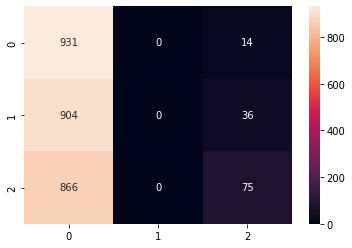

In [65]:
nb_model_1 = GaussianNB()

#Entreno el modelo
nb_model_1.fit(train_X, train_y)

#Realizo una predicción
y_pred = nb_model_1.predict(val_X_scaled)
print(np.around(nb_model_1.score(val_X, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(nb_model_1, X, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

0.543
[0.531 0.542 0.543 0.542 0.545]
Mean: 0.541, Standard Deviation: 0.005


<AxesSubplot:>

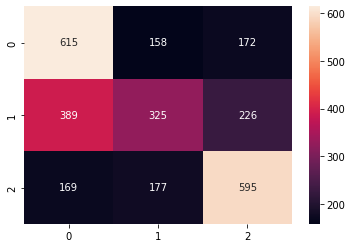

In [66]:
nb_model_2 = GaussianNB()
nb_model_2.fit(train_X_scaled, train_y)


y_pred = nb_model_2.predict(val_X_scaled)
print(np.around(nb_model_2.score(val_X_scaled, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(nb_model_2, X_scaled, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# SVM

In [67]:
svm_model_1 = SVC(decision_function_shape='ovo')
svm_model_1.fit(train_X_scaled, train_y)

SVC(decision_function_shape='ovo')

In [ ]:
y_pred = svm_model_1.predict(val_X_scaled)
print(np.around(svm_model_1.score(val_X_scaled, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(svm_model_1, X_scaled, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [85]:
param_grid = {
                'C': [0.5, 1, 10, 100], # NOTE: values for C must be > 0
                'gamma': ['scale', 1, .1, .01, .001, .0001],
                'kernel': ['rbf', 'linear'], # Some linear fittings last to 7/8 mins. Not recommended at all
                'decision_function_shape': ['ovo', 'ovr']
            }
# svm_grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv=5, verbose = 2, n_jobs=4)
svm_grid = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, cv=5, verbose = 2, n_jobs=4)

In [86]:
svm_grid.fit(train_X_scaled, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=10, decision_function_shape=ovo, gamma=scale, kernel=linear; total time= 3.1min
[CV] END C=10, decision_function_shape=ovo, gamma=scale, kernel=linear; total time= 3.3min
[CV] END C=10, decision_function_shape=ovo, gamma=scale, kernel=linear; total time= 3.4min
[CV] END C=10, decision_function_shape=ovo, gamma=scale, kernel=linear; total time= 3.7min
[CV] END C=10, decision_function_shape=ovr, gamma=0.0001, kernel=linear; total time= 2.7min
[CV] END C=10, decision_function_shape=ovo, gamma=scale, kernel=linear; total time= 3.0min
[CV] END C=10, decision_function_shape=ovr, gamma=0.0001, kernel=linear; total time= 2.8min
[CV] END C=0.5, decision_function_shape=ovo, gamma=0.1, kernel=rbf; total time=  19.1s
[CV] END C=10, decision_function_shape=ovr, gamma=0.0001, kernel=linear; total time= 3.1min
[CV] END C=0.5, decision_function_shape=ovo, gamma=0.1, kernel=rbf; total time=  18.9s
[CV] END C=0.5, decision_function_

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=4,
                   param_distributions={'C': [0.5, 1, 10, 100],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': ['scale', 1, 0.1, 0.01, 0.001,
                                                  0.0001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=2)

In [87]:
svm_grid.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'decision_function_shape': 'ovo', 'C': 0.5}

In [88]:
svm_grid.score(val_X_scaled, val_y)

0.7374380750176929

In [92]:
svm_model_2 = SVC(C= 0.5, gamma= 0.1, kernel='rbf', decision_function_shape= 'ovo')
svm_model_2.fit(train_X, train_y)

SVC(C=0.5, decision_function_shape='ovo', gamma=0.1)

In [93]:
y_pred = svm_model_2.predict(val_X_scaled)

In [94]:
svm_model_2.score(val_X_scaled, val_y)

0.3343949044585987

In [ ]:
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(train_X_scaled)

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
train_X_scaled_pca = pca.transform(train_X_scaled)
val_X_scaled_pca = pca.transform(val_X_scaled)

In [ ]:
train_pc1_coords = train_X_scaled_pca[:,0]
train_pc2_coords = train_X_scaled_pca[:,1]
train_pc3_coords = train_X_scaled_pca[:,2]

# LOGISTIC REGRESSION

/home/tomas/renewable_power_plants/renewable_power_plants_prediction/env_renewable_power_plants_pred/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6518046709129511


<AxesSubplot:>

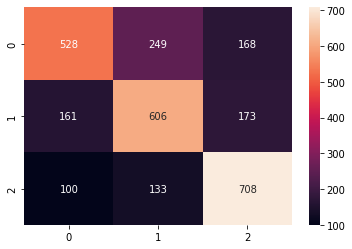

In [69]:
logistic_model_1 = LogisticRegression(multi_class= 'ovr')
logistic_model_1.fit(train_X_scaled, train_y)
y_pred = logistic_model_1.predict(val_X_scaled)
print(logistic_model_1.score(val_X_scaled, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# LDA

In [73]:
lda = LDA(n_components = 2)
train_X_scaled_lda = lda.fit_transform(train_X_scaled, train_y)
val_X_scaled_lda = lda.transform(val_X_scaled)

0.6532200990799717


<AxesSubplot:>

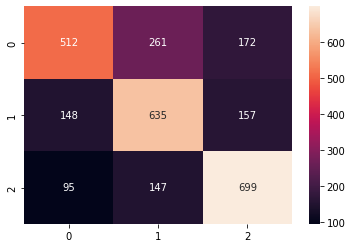

In [74]:
lda.fit(train_X_scaled_lda, train_y)
y_pred = lda.predict(val_X_scaled_lda)
print(lda.score(val_X_scaled_lda, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# NEURAL NETWORK

0.5707714083510261


<AxesSubplot:>

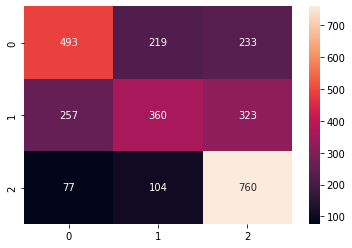

In [75]:
nn_model_1 = MLPClassifier(hidden_layer_sizes=(25,50,25), max_iter=200,activation = 'tanh',solver='adam',random_state=1)
nn_model_1.fit(train_X, train_y)
y_pred = nn_model_1.predict(val_X)
print(nn_model_1.score(val_X, val_y))
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# TEST PREDICTION

In [ ]:
df_to_predict = pd.read_csv(utils.DIR_DATA_EXTERNAL/"data_predict.csv", index_col=['index'])
df_to_predict.drop(columns=['latitude','longitude'], inplace=True)

In [ ]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [ ]:
# print(df_to_predict.columns)
# print(df_to_predict.columns.tolist())

In [ ]:
# columns_delete = df_to_predict.columns.str.contains('ALLSKY_KT') | df_to_predict.columns.str.contains('ANN') | df_to_predict.columns.str.contains('autumn_CLRSKY_SFC_SW_DWN_2019')
columns_delete = df_to_predict.columns.str.contains('ALLSKY_KT') | df_to_predict.columns.str.contains('ANN') | df_to_predict.columns.str.contains('2019') | df_to_predict.columns.str.contains('2013') | df_to_predict.columns.str.contains('2014') | df_to_predict.columns.str.contains('2015') | df_to_predict.columns.str.contains('2016') | df_to_predict.columns.str.contains('2017') | df_to_predict.columns.str.contains('MIN')
df_to_predict = df_to_predict.loc[:,~columns_delete]
# df_to_predict = df_to_predict.loc[:,~COLUMNS_TO_DELETE]

In [ ]:
y_predicted_test = xgbclass_model_1.predict(df_to_predict)
print(y_predicted_test)

In [ ]:
df_target_equivalent

# BAGGING CLASSIFIER

In [ ]:
bag_model_1 = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)
bag_model_1.fit(train_X_scaled, train_y)
y_pred = bag_model_1.predict(val_X_scaled)
# print(bag_model_1.score(val_X_scaled, val_y))

# results_cvs = cross_val_score(bag_model_1, train_X_scaled, train_y, cv=5)
# print(results_cvs)
# print(f'Mean: {results_cvs.mean()}, Standard Deviation: {results_cvs.std()}')
# confusion_matrix_return = confusion_matrix(val_y, y_pred)
# sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')


print(np.around(bag_model_1.score(val_X_scaled, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(bag_model_1, X_scaled, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

In [ ]:
classifier = {
        'KNeighbors': KNeighborsClassifier(n_neighbors=9),
        'DecisionTree': DecisionTreeClassifier(max_leaf_nodes=50),
        'XGBClassifier': XGBClassifier()
    }

for name, estimator in classifier.items():
    bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=5).fit(train_X_scaled, train_y)
    
    bag_pred = bag_class.predict(val_X_scaled)

    print(f'Accuracy Bagging with {name}: {accuracy_score(bag_pred, val_y)}')
    print('')
    print(f'Mean: {cross_val_score(bag_class, X, y, cv=5).mean()}, Standard Deviation: {cross_val_score(tree_model, X, y, cv=5).std()}')
    print('')

# VOTING CLASSIFIER

0.733
[0.748 0.748 0.748 0.729 0.739]
Mean: 0.742, Standard Deviation: 0.008


<AxesSubplot:>

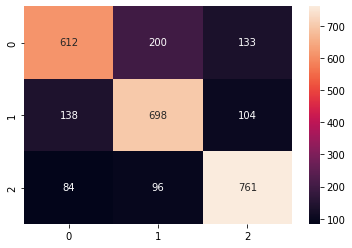

In [80]:


votclass_model_1 = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier(n_neighbors=9)), ('dt', DecisionTreeClassifier(max_leaf_nodes=50)), ('xgb', XGBClassifier())], voting='hard')
votclass_model_1.fit(train_X_scaled, train_y)

y_pred = votclass_model_1.predict(val_X_scaled)

print(np.around(votclass_model_1.score(val_X_scaled, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(votclass_model_1, X_scaled, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# ADABOOST

In [ ]:
adaBoost_model_1 = AdaBoostClassifier(n_estimators=100)
adaBoost_model_1.fit(train_X_scaled, train_y)

y_pred = adaBoost_model_1.predict(val_X_scaled)

print(np.around(adaBoost_model_1.score(val_X_scaled, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(adaBoost_model_1, X_scaled, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')

# GRADIENT TREE BOOSTING

In [ ]:
gradboost_model_1 = GradientBoostingClassifier(n_estimators=40)
gradboost_model_1.fit(train_X, train_y)
y_pred = gradboost_model_1.predict(val_X)
print(np.around(gradboost_model_1.score(val_X, val_y),3))
# If data is unordered in nature (i.e. non - Time series) then shuffle = True is right choice.
results_cvs = cross_val_score(gradboost_model_1, X, y, cv=StratifiedKFold(shuffle = True))
print(np.around(results_cvs, 3))
print(f'Mean: {np.around(results_cvs.mean(),3)}, Standard Deviation: {np.around(results_cvs.std(),3)}')
confusion_matrix_return = confusion_matrix(val_y, y_pred)
sns.heatmap(confusion_matrix_return, annot=True, fmt = 'g')